![alt text](awesome_logo.png "Awesome Retirement Portfolio Projector Tool")

# My Portfolio

In [21]:
import sqlalchemy as sql
import pandas as pd
import os
import datetime
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [22]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [23]:
# Get porfolio data
connection_string = 'sqlite:///awesome_app.db'
engine = sql.create_engine(connection_string, echo=False)

sql = """
  SELECT *
  FROM portfolio
"""

portfolio_df = pd.read_sql_query(sql, engine)
portfolio_df

,symbol,quantity,type
0,GOOG,10.0,Equity
1,CMG,20.0,Equity
2,IBM,50.0,Equity
3,XLB,100.0,Equity


In [4]:
print('My risk level is...')

My risk level is...


In [19]:
# Set the tickers
tickers = portfolio_df["symbol"]
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
# Set the number of years of data to fetch
num_years = 30

batch_size = 1000
num_days_data_needed = num_years * 365
first_date = datetime.datetime.now()
last_date = first_date - datetime.timedelta(days=num_days_data_needed)

def format_date_iso(date):
    return pd.Timestamp(date, tz="America/New_York").isoformat()

all_results_df = pd.DataFrame()
next_batch_date = first_date

while num_days_data_needed > 0:
    end_date = str(next_batch_date).split()[0]
    
    next_batch_date -= datetime.timedelta(days=batch_size)
    if next_batch_date < last_date:
        next_batch_date = last_date

    start_date = str(next_batch_date).split()[0]
    
    results_batch_df = alpaca.get_barset(
        tickers,
        timeframe,
        start = format_date_iso(start_date),
        end = format_date_iso(end_date),
        limit = batch_size
    ).df

    all_results_df = pd.concat([all_results_df, results_batch_df])
    num_days_data_needed -= batch_size
    
all_results_df.sort_index(inplace=True)

# Display data
# all_results_df

last_price = []
for t in portfolio_df['symbol']:
#     print(t)
#     print(all_results_df[t]['close'][-1])
    last_price.append(all_results_df[t]['close'][-1])
#     portfolio_df['price'] = all_results_df[t]['close'][-1]

portfolio_df['price'] = last_price
portfolio_df['total'] = portfolio_df['price'] * portfolio_df['quantity']
display(portfolio_df)
print(f"Total portfolio valus is {portfolio_df['total'].sum()}")

,symbol,quantity,type,price,total
0,GOOG,10.0,Equity,2769.18,27691.8
1,CMG,20.0,Equity,1888.44,37768.8
2,IBM,50.0,Equity,143.20,7160.0
3,XLB,100.0,Equity,86.45,8645.0


Total portfolio valus is 81265.6


<AxesSubplot:xlabel='time'>

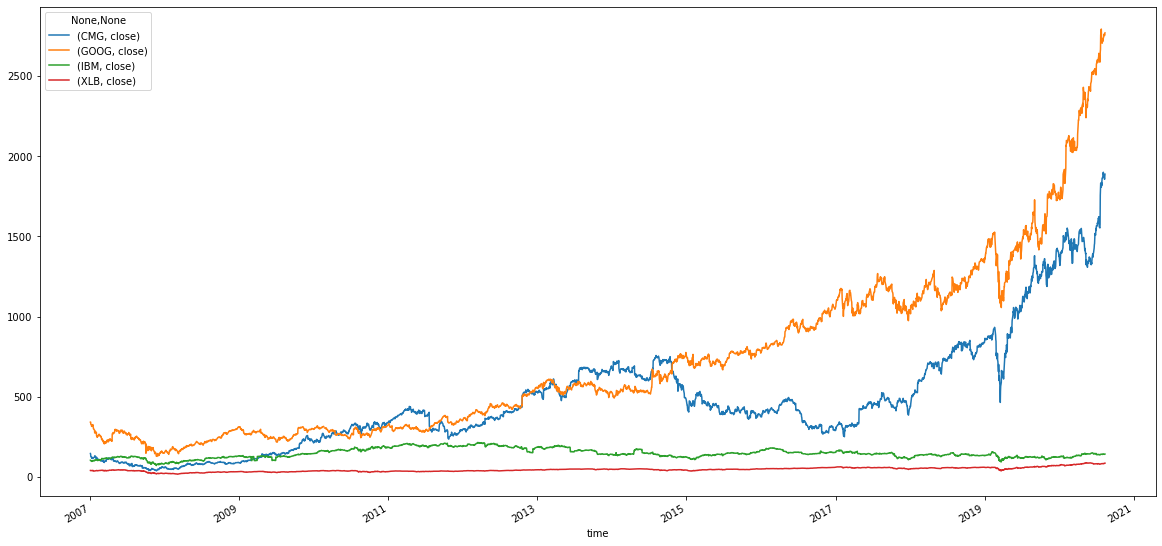

In [6]:
all_close_df = all_results_df.xs('close', axis=1, level=1, drop_level=False)
all_close_df.plot(figsize=[20, 10])

In [7]:
print("Current portfolio expected return")
print("Current portfolio volatility")
print("Current portfolio sharpe ratio")

Current portfolio expected return
Current portfolio volatility
Current portfolio sharpe ratio


---

# My Optimized Portfolio

In [8]:
print("Optimized portfolio expected return")
print("Optimized portfolio volatility")
print("Optimized portfolio sharpe ratio")

Optimized portfolio expected return
Optimized portfolio volatility
Optimized portfolio sharpe ratio
